In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

### Problem Statement:

Use QR decomposition to find the best-fit parameters $m$, ie:

$$ A = QR $$

where Q is an orthogonal ($Q^T Q = I$) matrix and $R$ is an upper triangular matrix. 

### Strategy:

The solution I found given a constant noise matrix in my written solutions was:

$$ m = R^{-1} Q^T d $$

So, it should be simple enough use an `np.linalg` function to return $A$'s QR decomposition and then return $m$, the best fit parameters.

In general, one can consider the noise matrix and find:

$$ A^T N^{-1} A m = A^T N^{-1} d $$

$$ R^T Q^T N^{-1} Q R m = R^T Q^T N^{-1} d $$

$$ m = \frac{Q^T N^{-1}}{(Q^T N^{-1} Q R)^{-1}}$$

But, for my coding here, I will consider only the simplified case.

First, define my reqular polynomial fitting, using linear algebra in our usual way

In [2]:
def reg_polyfit(x,data,order):
    n = len(x)
    a = np.zeros([n,order+1])
    a[:,0] = 1
    
    for i in range(order):
        a[:,i+1] = x*a[:,i]
        
    m = np.linalg.inv(a.T@a)@a.T@data
    return m

Next, define a QR decomposition fit, using the `numpy` library's handy `np.linalg.qr` to perform the QR decomposition

In [3]:
def qr_polyfit(x,data,order):
    n = len(x)
    a = np.zeros([n,order+1])
    a[:,0] = 1
    
    for i in range(order):
        a[:,i+1] = x*a[:,i]
        
    Q,R = np.linalg.qr(a)
    m = np.linalg.inv(R)@Q.T@data
    return m

Try a simple fifth order polynomial fit on some random polynomial with both the regular and QR decomposition

In [4]:
n = 1000
order=5
x = np.linspace(-1,1,n)
y = x**5 + 3*x**2 + 0.38472*x + 803.3
data = y + np.random.randn(n)*1
m_reg = reg_polyfit(x,data,order)
m_qr = qr_polyfit(x,data,order)
fit_reg = np.zeros(n)
fit_qr = np.zeros(n)

for i in range(order+1):
    fit_reg += m_reg[i]*x**i
    fit_qr += m_qr[i]*x**i

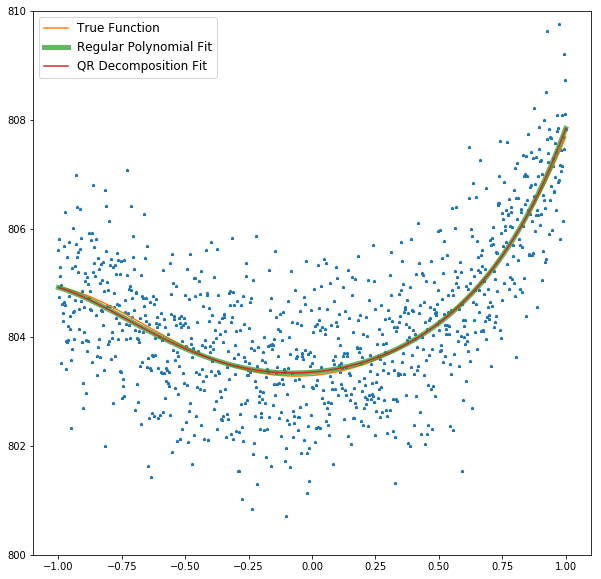

In [5]:
plt.figure(figsize=(10,10))
plt.plot(x,data,'*',markersize=3)
plt.plot(x,y,label='True Function')
plt.plot(x,fit_reg,label='Regular Polynomial Fit',linewidth=5,alpha=0.75)
plt.plot(x,fit_qr,label='QR Decomposition Fit')
plt.xlim(-1.1,1.1)
plt.ylim(800,810)
plt.legend(fontsize='large')
plt.show()

As expected, they perform remarkably similar. So similarly, in fact, that the two curves overlap one another! Now let's try to break the regular fit by doing a higher order polynomial, and see of QR decomposition is up to the task with a lower condition number.

In [6]:
order = 25
y = x**15 + 8*x**10 + 3*x**5 + 3*x**2 + 0.38472*x + 803.3
m_reg = reg_polyfit(x,data,order)
m_qr = qr_polyfit(x,data,order)
fit_reg = np.zeros(n)
fit_qr = np.zeros(n)

for i in range(order+1):
    fit_reg += m_reg[i]*x**i
    fit_qr += m_qr[i]*x**i

Now take a look at the fits

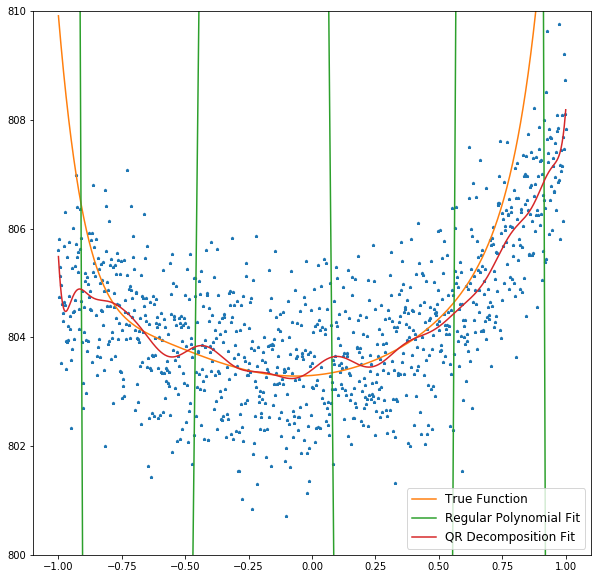

In [7]:
plt.figure(figsize=(10,10))
plt.plot(x,data,'*',markersize=3)
plt.plot(x,y,label='True Function')
plt.plot(x,fit_reg,label='Regular Polynomial Fit')
plt.plot(x,fit_qr,label='QR Decomposition Fit')
plt.xlim(-1.1,1.1)
plt.ylim(800,810)
plt.legend(fontsize='large')

The QR decomposition fit does a far better job of predicting the true function's value compared to the regular fit - I mean really, that regular polynomail fit is struggling.

# Problem 2

### Problem Statement:



In [8]:
def chebyshev_fit(x,data,order):
    a = np.zeros([n,order+1])
    a[:,0] = 1
    a[:,1] = x
    
    for i in range(1,order):
        a[:,i+1] = 2*x*a[:,i] - a[:,i-1]
        
    Q,R = np.linalg.qr(a)
    m = np.linalg.inv(R)@Q.T@data
    return m

In [9]:
n = 10000
x = np.linspace(-1,1,n)
y = np.exp(x)
order = 6
m_ord_6 = chebyshev_fit(x,y,order)

fit_ord_6 = np.zeros(n)
for i in range(order+1):
    fit_ord_6 += m_ord_6[i]*np.cos(i*np.arccos(x))

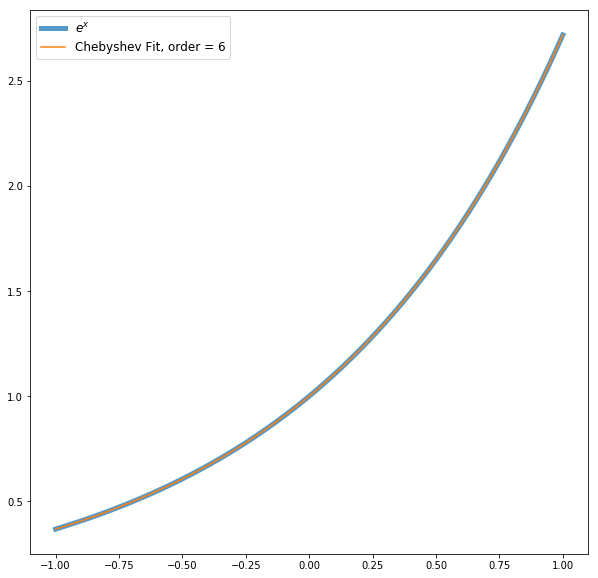

In [10]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,label='$e^x$',linewidth=5,alpha=0.75)
plt.plot(x,fit_ord_6,label='Chebyshev Fit, order = %s' % (str(order)))
plt.legend(fontsize='large')
plt.show()

At the much higher 

In [11]:
order = 200
m_ord_200 = chebyshev_fit(x,y,order)

fit_ord_200 = np.zeros(n)
for i in range(order+1):
    fit_ord_200 += m_ord_200[i]*np.cos(i*np.arccos(x))
    
fit_ord_200_cut = np.zeros(n)
for i in range(7):
    fit_ord_200_cut += m_ord_200[i]*np.cos(i*np.arccos(x))

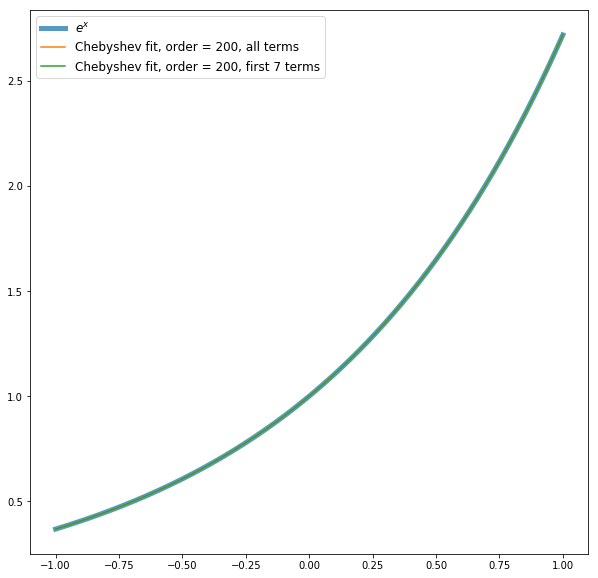

In [12]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,label='$e^x$',lw=5,alpha=0.75)
plt.plot(x,fit_ord_200,label='Chebyshev fit, order = %s, all terms' % (str(order)))
plt.plot(x,fit_ord_200_cut,label='Chebyshev fit, order = %s, first 7 terms' % (str(order)))
plt.legend(fontsize='large')
plt.show()

Plot the residuals to get a sense of which fit is better

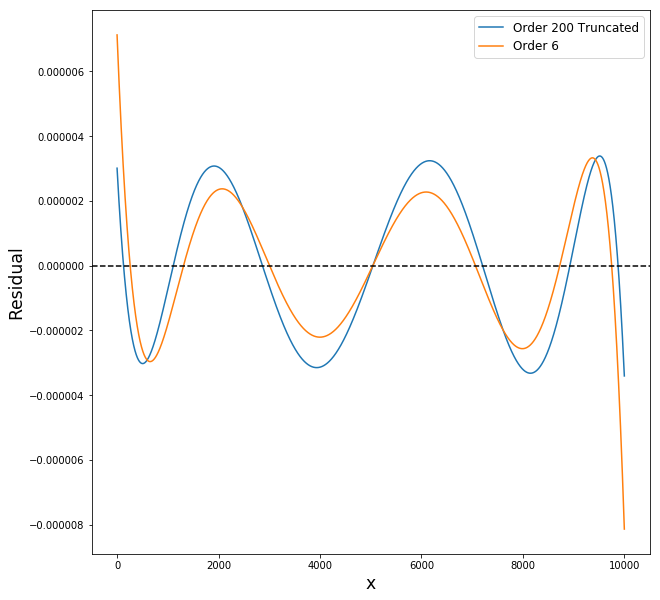

In [13]:
plt.figure(figsize=(10,10))
plt.plot(fit_ord_200_cut - y,label='Order 200 Truncated')
plt.plot(fit_ord_6 - y,label='Order 6')
plt.axhline(0,c='k',ls='--')
plt.legend(fontsize='large')
plt.ylabel('Residual',fontsize='xx-large')
plt.xlabel('x',fontsize='xx-large')
plt.show()

Now look at what the RMS error and max error of the fits are

In [15]:
RMS_err_6 = np.std(fit_ord_6 - y)
max_err_6 = (abs(fit_ord_6 - y)).max()
RMS_err_cut = np.std(fit_ord_200_cut - y)
max_err_cut = (abs(fit_ord_200_cut - y)).max()

print(RMS_err_6)
print(max_err_6)
print(RMS_err_cut)
print(max_err_cut)

1.9728492566435777e-06
8.140894895536377e-06
2.257689765636461e-06
3.409262363973653e-06


Based on the terms we ignored, we would expect the max RMS error to be about the sum of the coefficients for the terms we ignored in the high order fit (since the high order fit essentially perfectly fits the data).

Ratio of RMS_err_cut over RMS_err_6 should be 1.15 if everything was done correctly

In [16]:
RMS_err_cut/RMS_err_6

1.1443802703291606

Close! Ratio of max_err_cut to max_err_6 should less than 0.5 if everything was done correctly

In [17]:
max_err_cut/max_err_6

0.4187822601472154

Looking good!

# Problem 3

### Problem Statement:

Use the fact that introducing a rotation applied to both the data and the noise leaves $\chi^2$ unchanged, generate realizations of random noise with correlations in them. 

### Strategy:

Perform Eigendecomposition on the correlation matrix $C$, ie:

$$C = V\Lambda V^T$$

where $V$ is a matrix with the eigenvectors of $C$ as columns and $\Lambda$ is a matrix with the eigenvalues of $C$ on the diagonals and 0 elsewhere.

$$\chi^2 = (d_i - m_i)^T N^{-1} (d_i - m_i)$$

If our data is JUST NOISE: $(d_i - m_i)$ becomes just the noise of the i'th data point:

$$ \chi^2 = n_i ^T N^{-1} n_i $$

For correlated noise, $N$ is some general matrix. Want to rotate this into a diagonal matrix. Can use eigenvalue decomposition:

$$ \chi^2 = n_i^T (V\Lambda V^T)^{-1} n_i$$

$$ \chi^2 = n_i^T (V^{T^{-1}} \Lambda^{-1} V^{-1}) $$

but $V^{-1} = V^T$:

$$ \chi^2 = n_i^T V \Lambda^{-1} V^T n_i $$

let $\tilde{n} = V^T n$

$$ \chi^2 = \tilde{n_i}^T \Lambda^{-1} \tilde{n_i} $$

$\tilde{n_i} = \sqrt{eval_i}$ because eigenvalues are the standard deviations 

Want to get $n$ back from $\tilde{n}$ because we want our correlated noise matrix: $n = V\tilde{n}$ 

In [35]:
n = 500

I'm going to use the simple example suggested, but in principle $N$ here can be any correlation matrix.

In [88]:
N = np.ones([n,n]) + np.eye(n)

Using `eigh` as opposed to `eig` to avoid imaginary number weirdness: but are all noise matrices real and symmetric? Intuitively, I think so: correlations match symmetrically and I don't see any reason for non-real noise.

`V[:,i]` is the normalized e-vector corresponding to e-val `i`

In [114]:
N = abs(np.random.randn(n,n))

In [115]:
e_vals,V = np.linalg.eigh(N)

In [116]:
col,row = np.diag_indices(N.shape[0])
Lam = np.zeros([n,n])
Lam[col,row] = np.sqrt(abs(e_vals))

In [117]:
n_i_tilde = np.random.normal(scale=np.sqrt(abs(e_vals)))
n_i = V@n_i_tilde

Check that my noise looks correlated to some new mean

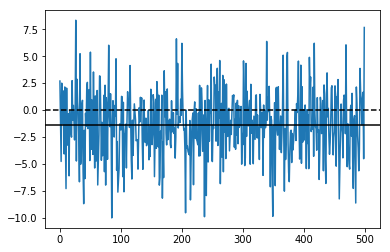

In [118]:
plt.plot(n_i)
plt.axhline(0,c='k',ls='--')
plt.axhline(n_i.mean(),c='k')
plt.show()

Now average this noise over many iterations (ie: $<d d^T>$) and see if it converges to the noise matrix:

In [119]:
num_iterations = 100
d = []

for i in range(num_iterations):
    n_i_tilde = np.random.normal(scale=np.sqrt(abs(e_vals)))
    n_i = V@n_i_tilde
    d.append(np.outer(n_i,n_i.T))

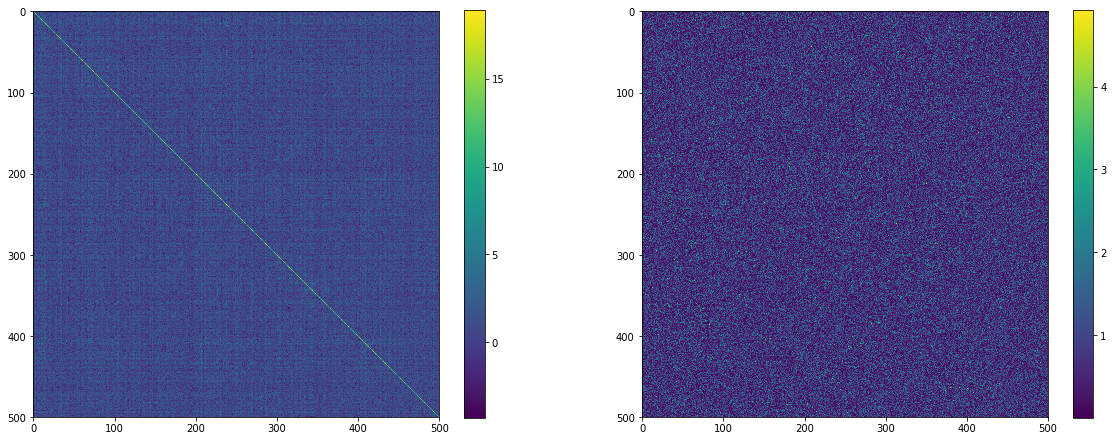

In [122]:
d_dT = np.average(d,axis=0)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
im1 = ax[0].imshow(d_dT)
im2 = ax[1].imshow(N)
fig.colorbar(im1,ax=ax[0],shrink=0.75)
fig.colorbar(im2,ax=ax[1],shrink=0.75)
plt.show()

Looks like it's fairly convergent! Just in terms of RMS difference:

In [87]:
np.std(d_dT - N)

0.1832213937934083

## Question 4

Want to find error bar on amplitude

$$var(m) = <m m^T> = (A^T N^{-1} A)^{-1}$$

for some external reason we knew $N$ so:

$$\sigma_m = \sqrt{(A^T N^{-1} A)^{-1}}$$